In [7]:
# Set paths

import os
import pandas as pd

main = '/Users/inesseverino/Library/CloudStorage/OneDrive-FondazioneIstitutoItalianoTecnologia/PythonCourse/python-cimec-ines-severino/'



rsopen = pd.read_csv(os.path.join(main, 'rs_open_alpha_amplitude_AllBlocks.csv'))
rsclosed = pd.read_csv(os.path.join(main, 'rs_closed_alpha_amplitude_AllBlocks.csv'))

rsopen.head()
           

,subid,diagnosis,age,sex,fiq,rs_block,alpha_amplitude_1,alpha_amplitude_2,alpha_amplitude_3,alpha_amplitude_4,...,alpha_amplitude_120,alpha_amplitude_121,alpha_amplitude_122,alpha_amplitude_123,alpha_amplitude_124,alpha_amplitude_125,alpha_amplitude_126,alpha_amplitude_127,alpha_amplitude_128,alpha_amplitude_Cz
0,sub001,ASD,16.015400,Male,96.0,1,NaN,0.671470,0.667557,0.738617,...,NaN,NaN,0.728706,0.617343,0.756873,NaN,NaN,NaN,NaN,NaN
1,sub002,ASD,16.034565,Male,101.0,1,NaN,0.604223,0.450920,0.297923,...,NaN,NaN,0.573196,0.424479,0.242183,NaN,NaN,NaN,NaN,NaN
2,sub003,TD,9.586356,Female,103.0,1,NaN,0.653599,0.880420,0.756244,...,NaN,NaN,0.761462,0.668724,0.709401,NaN,NaN,NaN,NaN,NaN
3,sub004,TD,8.455624,Male,110.0,1,NaN,0.683474,0.469562,0.655806,...,NaN,NaN,0.802385,0.691597,0.312198,NaN,NaN,NaN,NaN,NaN
4,sub005,TD,7.662103,Male,144.0,1,NaN,0.445379,0.564314,0.526308,...,NaN,NaN,0.542050,0.604856,0.548456,NaN,NaN,NaN,NaN,NaN


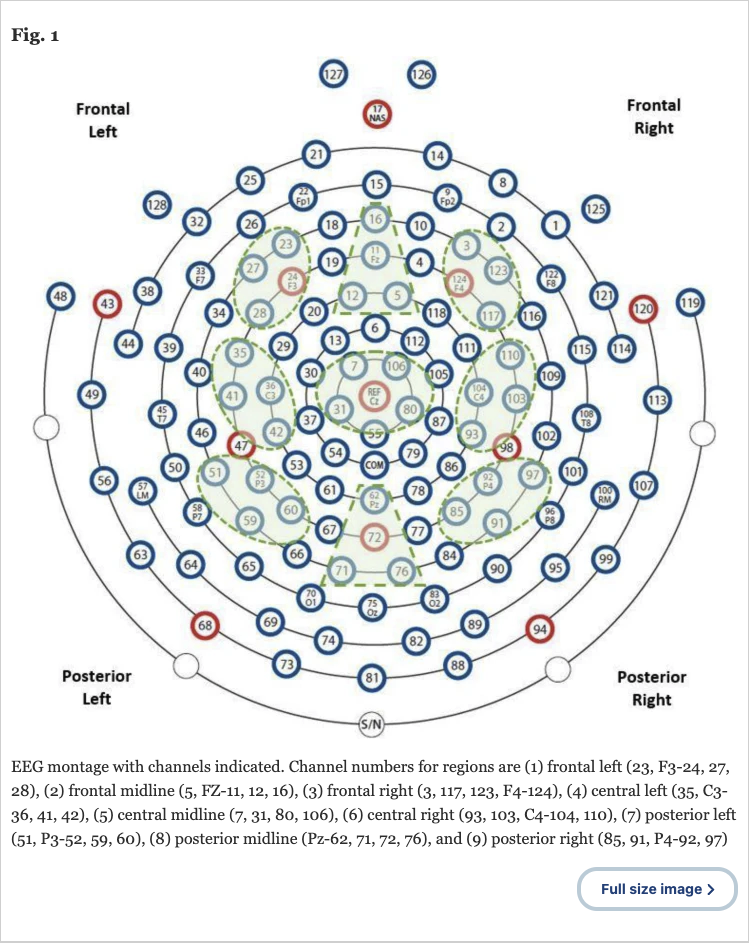

In [8]:
# Load infos about EEG montage and display regions channels

from IPython.display import Image, display

# Load and display an image
image_path = os.path.join(main, "EEG_regions_electrodes.png") # Update this to the path of your image file
display(Image(filename=image_path))

channel_dict = {
        "frontal_left": [23, 24, 27, 28],
        "frontal_midline": [5, 11, 12, 16],
        "frontal_right": [3, 117, 123, 124],
        "central_left": [ 35, 36, 41, 42],
        "central_midline": [7, 31, 80, 106],
        "central_right": [93, 103, 104, 110],
        "posterior_left": [51, 52, 59, 60],
        "posterior_midline": [62, 71, 72, 76],
        "posterior_right": [85, 91, 92, 97]
                 }
 

In [9]:
#frequencies 
frequencies = ["alpha"]

In [14]:
# Generate columns of the dataframe

frequencies = ["alpha"]

columns = list(["subid","rs_block", "diagnosis", "age", "sex", "fiq"])
frequencies_parameters = []

for band in frequencies:
    parameters = [ f"{band}_amplitude"]
    frequencies_parameters.extend(parameters)
   
for region in channel_dict.keys():
    region_columns = [f"{parameter}_{region}" for parameter in frequencies_parameters]
    columns.extend(region_columns)


In [18]:
# RESTING STATE CLOSED
# Initialize all subjects database

data_row = [1] * len(columns)  # Example data for one row, all values set to 1",
data_dict = {col: "NA" for col, val in zip(columns, data_row)}
all_df = pd.DataFrame([data_dict])


for rs_block in range(1, 6): 

    # subset block data
    freq_data = rsclosed[rsclosed['rs_block']==rs_block]
    freq_data= freq_data.iloc[0:].reset_index()
    freq_string = "alpha"

    # Get subj list
    sublist = set(freq_data["subid"])

    
    # Plot over subjects
    for i_sub, sub in enumerate(sublist):

        df = pd.DataFrame([data_dict])
        df.at[0, "subid"] = sub
        df.at[0, "rs_block"] = rs_block
        df.at[0, "diagnosis"] = freq_data.loc[i_sub, 'diagnosis']
        df.at[0, "age"] = freq_data.loc[i_sub, 'age']
        df.at[0, "sex"] = freq_data.loc[i_sub, 'sex']
        df.at[0, 'fiq'] = freq_data.loc[i_sub, 'fiq']

        for reg in channel_dict.keys():
        
            channel_list = channel_dict[reg]
            parameters = [ f"{freq_string}_amplitude"]
        
            # Get the average for channels in the region
            for par in parameters:
                columns_to_average = [f"{par}_{ch}" for ch in channel_list]
                df.at[0, f"{par}_{reg}"] = freq_data.loc[i_sub, columns_to_average].mean()

        all_df = pd.concat([all_df, df])


# save database
closed_region_data = all_df.iloc[1:] # remove empty rom

closed_region_data.to_csv(os.path.join(main, "rs_closed_alpha_regions_AllBlocks.csv"), index=False) 
closed_region_data.head()

,subid,rs_block,diagnosis,age,sex,fiq,alpha_amplitude_frontal_left,alpha_amplitude_frontal_midline,alpha_amplitude_frontal_right,alpha_amplitude_central_left,alpha_amplitude_central_midline,alpha_amplitude_central_right,alpha_amplitude_posterior_left,alpha_amplitude_posterior_midline,alpha_amplitude_posterior_right
0,sub257,1,ASD,13.61978,Female,99.0,0.279574,0.475762,0.685465,1.072342,0.765035,0.805797,0.859707,0.599731,0.550805
0,sub368,1,ASD,5.269336,Male,NaN,0.852481,0.884786,1.084743,1.145424,1.159229,1.100443,1.191276,1.012455,1.053669
0,sub387,1,TD,5.016997,Male,NaN,1.305926,1.218931,1.198498,1.476741,1.426741,1.609798,1.439965,1.566246,1.725073
0,sub366,1,TD,6.106548,Male,106.0,0.914968,0.671018,0.70108,1.185976,1.035356,0.904155,1.454538,1.263368,1.218857
0,sub022,1,ASD,5.123659,Male,NaN,0.785584,0.435464,0.262812,0.889252,0.667036,0.685511,0.854082,1.018308,0.756252


In [13]:
# RESTING STATE OPEN
# Initialize all subjects database

data_row = [1] * len(columns)  # Example data for one row, all values set to 1",
data_dict = {col: "NA" for col, val in zip(columns, data_row)}
all_df = pd.DataFrame([data_dict])
all_df.head()


for rs_block in range(1, 6): 

    # subset block data
    freq_data = rsopen[rsopen['rs_block']==rs_block]
    freq_data= freq_data.iloc[0:].reset_index()
    freq_string = "alpha"

    # get sub list
    sublist = set(freq_data["subid"])

    for i_sub, sub in enumerate(sublist):

        df = pd.DataFrame([data_dict])
        df.at[0, "subid"] = sub
        df.at[0, "rs_block"] = rs_block
        df.at[0, "diagnosis"] = freq_data.loc[i_sub, 'diagnosis']
        df.at[0, "age"] = freq_data.loc[i_sub, 'age']
        df.at[0, "sex"] = freq_data.loc[i_sub, 'sex']
        df.at[0, 'fiq'] = freq_data.loc[i_sub, 'fiq']

        for reg in channel_dict.keys():
        
            channel_list = channel_dict[reg]
            print(channel_list)
            parameters = [ f"{freq_string}_amplitude"]
        
            # compute the average for groups of channels
            for par in parameters:
                columns_to_average = [f"{par}_{ch}" for ch in channel_list]
                df.at[0, f"{par}_{reg}"] = freq_data.loc[i_sub, columns_to_average].mean()

        all_df = pd.concat([all_df, df])


open_region_data = all_df.iloc[1:] # remove empty row
open_region_data.head()
open_region_data.to_csv(os.path.join(main, "rs_open_alpha_regions_AllBlocks.csv"), index=False) # Save database
 

[23, 24, 27, 28]
[5, 11, 12, 16]
[3, 117, 123, 124]
[35, 36, 41, 42]
[7, 31, 80, 106]
[93, 103, 104, 110]
[51, 52, 59, 60]
[62, 71, 72, 76]
[85, 91, 92, 97]
[23, 24, 27, 28]
[5, 11, 12, 16]
[3, 117, 123, 124]
[35, 36, 41, 42]
[7, 31, 80, 106]
[93, 103, 104, 110]
[51, 52, 59, 60]
[62, 71, 72, 76]
[85, 91, 92, 97]
[23, 24, 27, 28]
[5, 11, 12, 16]
[3, 117, 123, 124]
[35, 36, 41, 42]
[7, 31, 80, 106]
[93, 103, 104, 110]
[51, 52, 59, 60]
[62, 71, 72, 76]
[85, 91, 92, 97]
[23, 24, 27, 28]
[5, 11, 12, 16]
[3, 117, 123, 124]
[35, 36, 41, 42]
[7, 31, 80, 106]
[93, 103, 104, 110]
[51, 52, 59, 60]
[62, 71, 72, 76]
[85, 91, 92, 97]
[23, 24, 27, 28]
[5, 11, 12, 16]
[3, 117, 123, 124]
[35, 36, 41, 42]
[7, 31, 80, 106]
[93, 103, 104, 110]
[51, 52, 59, 60]
[62, 71, 72, 76]
[85, 91, 92, 97]
[23, 24, 27, 28]
[5, 11, 12, 16]
[3, 117, 123, 124]
[35, 36, 41, 42]
[7, 31, 80, 106]
[93, 103, 104, 110]
[51, 52, 59, 60]
[62, 71, 72, 76]
[85, 91, 92, 97]
[23, 24, 27, 28]
[5, 11, 12, 16]
[3, 117, 123, 124]
[35, 3